In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
wine_df = datasets.load_wine()

In [3]:
y = wine_df.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
model = KMeans(n_clusters=3)

In [5]:
model.fit(wine_df.data)

/home/konstantin/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
labels = model.labels_
y = wine_df.target

In [8]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(wine_df.data, labels):.3f}")

Homogeneity: 0.429
Completeness: 0.429
V-measure: 0.429
Adjusted Rand Index: 0.371
Adjusted Mutual Information: 0.423
Silhouette Coefficient: 0.571


In [9]:
prediction = model.predict(wine_df.data)

In [10]:
print(prediction)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


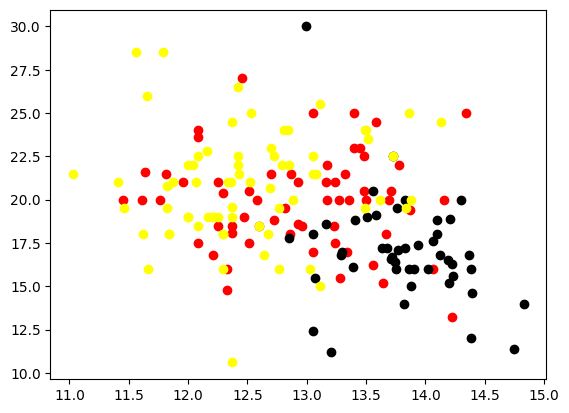

In [11]:
cluster_0 = wine_df.data[prediction == 0]
cluster_1 = wine_df.data[prediction == 1]
cluster_2 = wine_df.data[prediction == 2]
plt.scatter(cluster_0[:,0], cluster_0[:,3], color = 'red')
plt.scatter(cluster_1[:,0], cluster_1[:,3], color = 'black')
plt.scatter(cluster_2[:,0], cluster_2[:,3], color = 'yellow')

In [12]:
cluster_0

array([[1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.364e+01, 3.100e+00, 2.560e+00, 1.520e+01, 1.160e+02, 2.700e+00,
        3.030e+00, 1.700e-01, 1.660e+00, 5.100e+00, 9.600e-01, 3.360e+00,
        8.450e+02],
       [1.406e+01, 1.630e+00, 2.280e+00, 1.600e+01, 1.260e+02, 3.000e+00,
        3.170e+00, 2.400e-01, 2.100e+00, 5.650e+00, 1.090e+00, 3.710e+00,
        7.800e+02],
       [1.293e+01, 3.800e+00, 2.650e+00, 1.860e+01, 1.020e+02, 2.410e+00,
        2.410e+00, 2.500e-01, 1.980e+00, 4.500e+00, 1.030e+00, 3.520e+00,
        7.700e+02],
       [1.350e+01, 1.810e+00, 2.610e+00, 2.000e+01, 9.600e+01, 2.530e+00,
        2.610e+00, 2.800e-01, 1.660e+00, 3.520e+00, 1.120e+00, 3.820e+00,
        8.450e+02],
       [1.305e+01, 2.050e+00, 3.220e+00, 2.500e+01, 1.240e+02, 2.630e+00,
        2.680e+00, 4.700e-01, 1.920e+00, 3.580e+00, 1.130e+00, 3.200e+00,
        8.30

In [13]:
cluster_1[:,3]

array([15.6, 11.2, 18.6, 16.8, 15.2, 14.6, 17.6, 14. , 16. , 18. , 16.8,
       16. , 11.4, 12. , 17.2, 20. , 20. , 16.5, 16.6, 17.8, 16.1, 17. ,
       16. , 22.5, 19.1, 17.2, 19.5, 19. , 18. , 15.5, 18.8, 15. , 18.9,
       16. , 16. , 18.8, 17.4, 12.4, 17.2, 14. , 17.1, 16.4, 20.5, 16.3,
       16.8, 16.7, 30. ])

In [14]:
dbscan = DBSCAN(eps=1.0, min_samples=4)

In [15]:
dbscan.fit(wine_df.data)

DBSCAN(eps=1.0, min_samples=4)

In [16]:
pca = PCA(n_components=2).fit(wine_df.data)
pca_2d = pca.transform(wine_df.data)

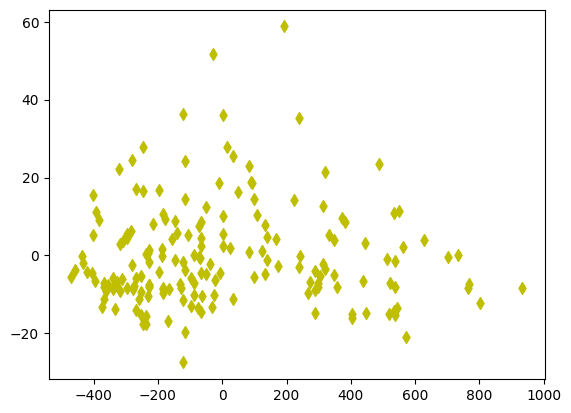

In [17]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

In [18]:
labes = dbscan.labels_

In [19]:
y = wine_df.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [20]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(wine_df.data, labels):.3f}")

Homogeneity: 0.429
Completeness: 0.429
V-measure: 0.429
Adjusted Rand Index: 0.371
Adjusted Mutual Information: 0.423
Silhouette Coefficient: 0.571


In [21]:
mirgings = linkage(wine_df.data, method='complete')

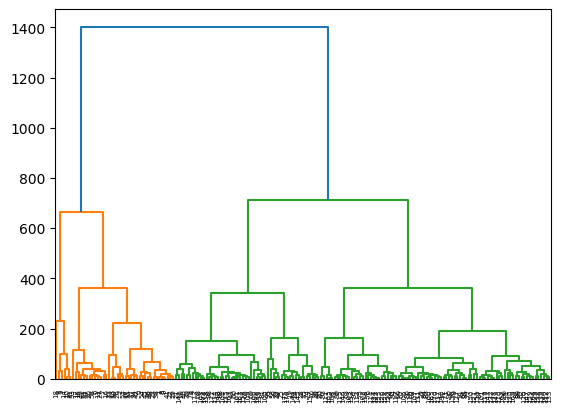

In [22]:
clusters = dendrogram(mirgings,leaf_rotation=90)